## <div style="text-align: center"> Área académica de Ingeniería en Computadores </div> 

## <div style="text-align: center"> CE - 5506 Introducción al Reconocimiento de Patrones </div>

## <div style="text-align: center"> Tarea #2 </div>

## <div style="text-align: left"> Estudiantes: </div> <br> <div style="text-align:center"> Cambronero Ureña Aldo - 2018099813 <br> Agüero Sandí Johnny - 2020027766 </div>
    
## <div style="text-align: left"> Profesor: </div> <br> <div style="text-align: center"> Jason Leiton Jimenez <br><br> </div>

## <div style="text-align: center"> Grupo 1 </div>

## <div style="text-align: center"> IS $-$ 2023 </div>

---

## <div style="text-align: center"> Primera Parte </div> 

### 1. Analice el código de regresión lineal visto en clase, el cual se encuentra en tecdigital con el nombre “RegresionLineal.ipynb”

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

In [3]:
class LinearRegression:
    
    def __init__(self, n_features):
        self.W = np.random.normal(-1,1,(n_features,1)) #weights
        self.b = np.random.rand(1) #intercept
        
    def descent(self, delta_W, delta_b, learning_rate):
        #updating the weights with the calculated gradients
        self.W -= learning_rate*delta_W                                                                  
        self.b -= learning_rate*delta_b 
        
    def derivatives(self, X, Y):
        #partial derivative of cost w.r.t the weights
        delta_W = np.sum(np.multiply(((np.matmul(X,self.W)+self.b)-Y), X))*2/X.shape[0] 
        #partial derivative of cost w.r.t the intercept
        delta_b = np.sum(((np.matmul(X,self.W)+self.b)-Y))*2/X.shape[0]                
        return delta_W, delta_b
    
    #fit
    def train(self, X, Y, epochs=50, learning_rate=0.1):
        X = np.array(X).reshape(-1,1)
        Y = np.array(Y).reshape(-1,1)
        for i in range(epochs):
            delta_W, delta_b = self.derivatives(X, Y)
            self.descent(delta_W, delta_b, learning_rate)
        return self.W, self.b
    def predict(self, X):
        #print(X.shape, X.reshape(-1,1).shape)
        product = np.matmul(np.array(X).reshape(-1,1),self.W)+self.b
        return product

### 2. Busque un set de datos básico (no imágenes) libre y carguelo. Posteriormente muestre un los primeros 10 datos con sus etiquetas.

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/aasthac67/Insurance_Charges_Prediction/main/insurance.csv")
df.head(10)
df.shape

(1338, 7)

### 3. Realice el proceso de feature engeneering.

In [10]:
x = (df['age']-df['age'].mean())/df['age'].std() #standardization of the dataset
y = (df["charges"]-df['charges'].mean())/df["charges"].std()
x.shape, y.shape

((1338,), (1338,))

### 4. Modifique el código proporcionado para que el modelo genere la regresión lineal sobre el set de datos elegido.

In [11]:
reg = LinearRegression(n_features=1)

[0.29900819] -3.001494209040064e-17


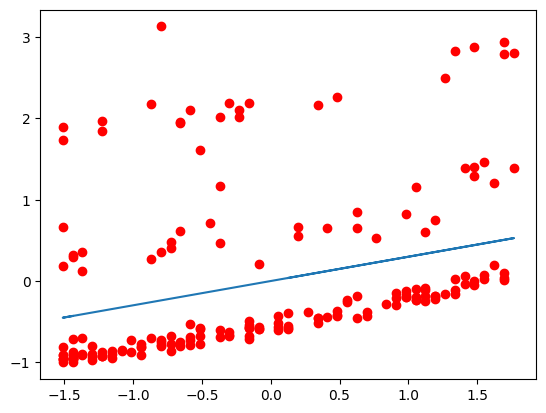

In [13]:
params = reg.train(x, y, epochs=500, learning_rate=0.3)
print(params[0][-1], params[1][-1])
plt.scatter(x[:180], y[:180], color='red')
pred = reg.predict(np.array(x[:180]))
plt.plot(x[:180], pred[:180])

## <div style="text-align: center"> Segunda Parte </div> 

### 1. Tome el código modificado y genere el mismo código sin utilizar bibliotecas de procesamiento matemático para las operaciones matriciales, es decir, debe hacerlo con solo listas.

In [ ]:
import random
import math

class Matrix:
    def __init__(self, matrix):
        self.matrix = matrix
    
    @staticmethod
    def from_shape(rows, columns):
        matrix = []
        for i in range(rows):
            row = []
            for j in range(columns):
                row.append(0)
            matrix.append(row)
        return Matrix(matrix)
    
    @staticmethod
    def random_normal(rows, columns, mu=0, sigma=1):
        matrix = Matrix.from_shape(rows, columns)
        for i in range(rows):
            for j in range(columns):
                x = random.uniform(0, 1)
                y = random.uniform(0, 1)
                z = math.sqrt(-2 * math.log(x)) * math.cos(2 * math.pi * y)
                matrix.matrix[i][j] = mu + sigma * z
        return matrix
    
    @staticmethod
    def random_uniform(rows, columns):
        matrix = Matrix.from_shape(rows, columns)
        for i in range(rows):
            for j in range(columns):
                matrix.matrix[i][j] = random.uniform(0, 1)
        return matrix
    
    def add(self, other_matrix):
        if len(self.matrix) != len(other_matrix.matrix) or len(self.matrix[0]) != len(other_matrix.matrix[0]):
            raise ValueError("The matrices have different dimensions")
        
        result = []
        for i in range(len(self.matrix)):
            row = []
            for j in range(len(self.matrix[0])):
                row.append(self.matrix[i][j] + other_matrix.matrix[i][j])
            result.append(row)
        return Matrix(result)
    
    def subtract(self, other_matrix):
        if len(self.matrix) != len(other_matrix.matrix) or len(self.matrix[0]) != len(other_matrix.matrix[0]):
            raise ValueError("The matrices have different dimensions")
        
        result = []
        for i in range(len(self.matrix)):
            row = []
            for j in range(len(self.matrix[0])):
                row.append(self.matrix[i][j] - other_matrix.matrix[i][j])
            result.append(row)
        return Matrix(result)
    
    def scalar_product(self, scalar):
        result = []
        for i in range(len(self.matrix)):
            row = []
            for j in range(len(self.matrix[0])):
                row.append(self.matrix[i][j] * scalar)
            result.append(row)
        return Matrix(result)
    
    def dot_product(self, other_matrix):
        if len(self.matrix[0]) != len(other_matrix.matrix):
            raise ValueError("The number of columns in the first matrix must be equal to the number of rows in the second matrix")
        
        result = []
        for i in range(len(self.matrix)):
            row = []
            for j in range(len(other_matrix.matrix[0])):
                dot_product = 0
                for k in range(len(self.matrix[0])):
                    dot_product += self.matrix[i][k] * other_matrix.matrix[k][j]
                row.append(dot_product)
            result.append(row)
        return Matrix(result)
    
    def reshape(self, rows, columns):
        if len(self.matrix) * len(self.matrix[0]) != rows * columns:
            raise ValueError("The total number of elements in the new shape must be equal to the total number of elements in the original matrix")
        
        flat_matrix = []
        for i in range(len(self.matrix)):
            for j in range(len(self.matrix[0])):
                flat_matrix.append(self.matrix[i][j])
        
        new_matrix = Matrix.from_shape(rows, columns)
        for i in range(rows):
            for j in range(columns):
                index = i * columns + j
                new_matrix.matrix[i][j] = flat_matrix[index]
        
        return new_matrix

In [1]:
class Linear_Regression_:
    
    def __init__(self, n_features):
        self.W = np.random.normal(-1,1,(n_features,1)) #weights
        self.b = np.random.rand(1) #intercept
        
    def descent(self, delta_W, delta_b, learning_rate):
        #updating the weights with the calculated gradients
        self.W -= learning_rate*delta_W                                                                  
        self.b -= learning_rate*delta_b 
        
    def derivatives(self, X, Y):
        #partial derivative of cost w.r.t the weights
        delta_W = np.sum(np.multiply(((np.matmul(X,self.W)+self.b)-Y), X))*2/X.shape[0] 
        #partial derivative of cost w.r.t the intercept
        delta_b = np.sum(((np.matmul(X,self.W)+self.b)-Y))*2/X.shape[0]                
        return delta_W, delta_b
    
    #fit
    def train(self, X, Y, epochs=50, learning_rate=0.1):
        X = np.array(X).reshape(-1,1)
        Y = np.array(Y).reshape(-1,1)
        for i in range(epochs):
            delta_W, delta_b = self.derivatives(X, Y)
            self.descent(delta_W, delta_b, learning_rate)
        return self.W, self.b
    def predict(self, X):
        #print(X.shape, X.reshape(-1,1).shape)
        product = np.matmul(np.array(X).reshape(-1,1),self.W)+self.b
        return product

### 2. Ahora realice el código de la primera parte utilizando únicamente Pytorch (tensores).

In [ ]:
import torch

class Linear_Regression:
    def __init__(self, n_features):
    self.W = torch.randn(n_features, 1, requires_grad=True) #weights
    self.b = torch.randn(1, requires_grad=True) #intercept
    
    def descent(self, delta_W, delta_b, learning_rate):
        #updating the weights with the calculated gradients
        self.W.data -= learning_rate*delta_W.data                                                                  
        self.b.data -= learning_rate*delta_b.data 

    def derivatives(self, X, Y):
        #partial derivative of cost w.r.t the weights
        delta_W = torch.sum(torch.mul(((torch.matmul(X,self.W)+self.b)-Y), X))*2/X.shape[0] 
        #partial derivative of cost w.r.t the intercept
        delta_b = torch.sum(((torch.matmul(X,self.W)+self.b)-Y))*2/X.shape[0]                
        return delta_W, delta_b

    #fit
    def train(self, X, Y, epochs=50, learning_rate=0.1):
        X = torch.tensor(X, dtype=torch.float32).reshape(-1,1)
        Y = torch.tensor(Y, dtype=torch.float32).reshape(-1,1)
        for i in range(epochs):
            delta_W, delta_b = self.derivatives(X, Y)
            self.descent(delta_W, delta_b, learning_rate)
        return self.W.data, self.b.data

    def predict(self, X):
        product = torch.matmul(torch.tensor(X, dtype=torch.float32).reshape(-1,1),self.W)+self.b
        return product.data

### 3. Ejecute ambos códigos y haga comparaciones en los tiempos de ejecución (Realice este paso con el set de datos elegido, con uno creado por cada grupo y con el mostrado en clase de altura y pesos).
